In [ ]:
                                                                
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
fileName = '/content/drive/MyDrive/gsk_excel.xlsx'

In [ ]:
df= pd.read_excel(fileName)

In [ ]:
df.head()

,participant_id,age,sex,weight,height,trt_grp,BMI,protein_concentration,RESPONSE
0,SUBJ_001,46,Female,84.66,1.59,DRUG,33.487599,148.0,N
1,SUBJ_002,47,Female,71.21,1.64,DRUG,26.476056,85.0,Y
2,SUBJ_003,48,Female,69.85,1.73,CONTROL,23.338568,183.0,N
3,SUBJ_004,59,Female,62.94,1.50,DRUG,27.973333,89.0,Y
4,SUBJ_005,59,Female,113.91,1.63,CONTROL,42.873273,137.0,N


In [ ]:
df.dtypes

participant_id            object
age                        int64
sex                       object
weight                   float64
height                   float64
trt_grp                   object
BMI                      float64
protein_concentration    float64
RESPONSE                  object
dtype: object

In [ ]:
df1=df

In [ ]:
# data transformation to build the model
# this function takes a dataframe an loops through it to print columns of type object
def print_unique_col_values(df):
  for column in df:
    if df[column].dtypes =='object':
      print(f'{column}: {df[column].unique()}')

In [ ]:
#Removing participant_id
df1 = df1.drop('participant_id', axis=1)

In [ ]:
print_unique_col_values(df1)

sex: ['Female' 'Male']
trt_grp: ['DRUG' 'CONTROL']
RESPONSE: ['N' 'Y']


In [ ]:
#Extracting record for only miraculon-B

miraculonB_df = df1[df1['trt_grp']=='DRUG']
miraculonB_df


,age,sex,weight,height,trt_grp,BMI,protein_concentration,RESPONSE
0,46,Female,84.66,1.59,DRUG,33.487599,148.0,N
1,47,Female,71.21,1.64,DRUG,26.476056,85.0,Y
3,59,Female,62.94,1.50,DRUG,27.973333,89.0,Y
7,57,Male,93.50,1.63,DRUG,35.191388,115.0,N
8,72,Male,85.57,1.68,DRUG,30.318169,197.0,N
...,...,...,...,...,...,...,...,...
762,70,Female,62.21,1.66,DRUG,22.575846,89.0,Y
764,65,Male,112.86,1.76,DRUG,36.434659,122.0,N
765,60,Male,81.03,1.77,DRUG,25.864215,121.0,N
766,53,Male,88.67,1.72,DRUG,29.972282,126.0,Y


In [ ]:
# Dropping column containing sngle value
miraculonB_df=miraculonB_df.drop('trt_grp', axis=1)


KeyError: ignored

In [ ]:
miraculonB_df

,age,sex,weight,height,BMI,protein_concentration,RESPONSE
0,46,Female,84.66,1.59,33.487599,148.0,N
1,47,Female,71.21,1.64,26.476056,85.0,Y
3,59,Female,62.94,1.50,27.973333,89.0,Y
7,57,Male,93.50,1.63,35.191388,115.0,N
8,72,Male,85.57,1.68,30.318169,197.0,N
...,...,...,...,...,...,...,...
762,70,Female,62.21,1.66,22.575846,89.0,Y
764,65,Male,112.86,1.76,36.434659,122.0,N
765,60,Male,81.03,1.77,25.864215,121.0,N
766,53,Male,88.67,1.72,29.972282,126.0,Y


In [ ]:
miraculonB_df.dtypes

age                        int64
sex                       object
weight                   float64
height                   float64
BMI                      float64
protein_concentration    float64
RESPONSE                  object
dtype: object

In [ ]:
miraculonB_df['sex'].replace({'Female':1, 'Male':0}, inplace=True)

In [ ]:
miraculonB_df

,age,sex,weight,height,BMI,protein_concentration,RESPONSE
0,46,1,84.66,1.59,33.487599,148.0,N
1,47,1,71.21,1.64,26.476056,85.0,Y
3,59,1,62.94,1.50,27.973333,89.0,Y
7,57,0,93.50,1.63,35.191388,115.0,N
8,72,0,85.57,1.68,30.318169,197.0,N
...,...,...,...,...,...,...,...
762,70,1,62.21,1.66,22.575846,89.0,Y
764,65,0,112.86,1.76,36.434659,122.0,N
765,60,0,81.03,1.77,25.864215,121.0,N
766,53,0,88.67,1.72,29.972282,126.0,Y


In [ ]:
miraculonB_df['RESPONSE'].replace({'Y':1, 'N':0}, inplace=True)

In [ ]:
miraculonB_df.dtypes

age                        int64
sex                        int64
weight                   float64
height                   float64
BMI                      float64
protein_concentration    float64
RESPONSE                   int64
dtype: object

In [ ]:
miraculonB_df.describe()

,age,sex,weight,height,BMI,protein_concentration,RESPONSE
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,61.759791,0.488251,90.844100,1.682742,31.992628,122.077669,0.548303
std,7.565750,0.500516,22.465539,0.097062,7.161227,30.183344,0.498312
min,37.000000,0.000000,46.170000,1.430000,17.975421,56.000000,0.000000
25%,57.000000,0.000000,74.340000,1.610000,26.704177,99.500000,0.000000
50%,62.000000,0.000000,89.220000,1.680000,31.678201,118.000000,1.000000
75%,67.000000,1.000000,104.135000,1.760000,36.318756,141.500000,1.000000
max,79.000000,1.000000,160.120000,1.940000,67.515601,199.000000,1.000000


In [ ]:
df3=miraculonB_df

In [ ]:
# scaling some of the features
cols_to_scale = ['age', 'weight', 'height','BMI','protein_concentration']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df3[cols_to_scale] = scaler.fit_transform(df3[cols_to_scale])

In [ ]:
for col in df3:
  print(f'{col}: {df3[col].unique()}')

age: [0.21428571 0.23809524 0.52380952 0.47619048 0.83333333 0.85714286
 0.38095238 0.5        0.42857143 0.66666667 0.4047619  0.33333333
 0.45238095 0.69047619 0.76190476 0.28571429 0.61904762 0.5952381
 0.64285714 0.80952381 0.57142857 0.97619048 0.73809524 0.95238095
 0.54761905 0.35714286 0.71428571 1.         0.78571429 0.88095238
 0.16666667 0.30952381 0.9047619  0.04761905 0.92857143 0.
 0.26190476 0.19047619]
sex: [1 0]
weight: [0.33777973 0.2197455  0.14716981 0.41535761 0.34576569 0.3968195
 0.69197016 0.26450197 0.39333041 0.29872751 0.35612111 0.74997806
 0.4230803  0.34681878 0.61254936 0.46967968 0.25247916 0.44107065
 0.0817025  0.50179903 0.33058359 0.36314173 0.20991663 0.36796841
 0.58411584 0.55594559 0.46634489 0.16191312 0.71443616 0.27836771
 0.4754717  0.50864414 0.02395788 0.14918824 0.51426064 0.8896007
 0.80421237 0.44914436 0.05660377 0.91426064 0.35726196 0.28740676
 0.436595   0.69556823 0.17586661 0.42448442 0.06265906 0.40008776
 0.16129882 0.28600263 0.

In [ ]:
df4=df3

In [ ]:
#Train and split the data
X = df3.drop('RESPONSE', axis = 'columns')
y = testLabels = df3.RESPONSE.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=15, stratify = y)

In [ ]:
y_train.value_counts()

1.0    168
0.0    138
Name: RESPONSE, dtype: int64

In [ ]:
y_test.value_counts()

1.0    42
0.0    35
Name: RESPONSE, dtype: int64

In [ ]:
X_train.shape

(306, 6)

In [ ]:
X_test.shape

(77, 6)

In [ ]:
X_train

,age,sex,weight,height,BMI,protein_concentration
12,0.500000,1,0.264502,0.490196,0.182919,0.580420
312,0.285714,0,0.293550,0.607843,0.167998,0.692308
755,0.666667,0,0.622817,0.725490,0.366953,0.503497
676,0.380952,1,0.047652,0.019608,0.139459,0.699301
315,0.690476,0,0.513208,0.647059,0.319111,0.391608
...,...,...,...,...,...,...
43,0.809524,1,0.714436,0.490196,0.549599,0.804196
382,0.714286,1,0.194559,0.411765,0.150051,0.370629
507,0.333333,1,0.225362,0.294118,0.218126,0.517483
474,0.547619,1,0.280474,0.411765,0.223526,0.405594


In [ ]:
#X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
684,1,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2446,1,0,0,0,0.239437,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2220,0,0,1,0,1.000000,1,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
5131,1,0,1,0,0.605634,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4372,0,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4687,0,0,1,0,0.295775,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2385,1,0,0,1,0.028169,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
6773,0,1,1,0,0.507042,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [ ]:
len(X_train.columns)

6

In [ ]:
# Use logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
def log_reg(X_train, y_train, X_test, y_test, weights):
  if weights ==-1:
    model = LogisticRegression()
  else:
    model = LogisticRegression(class_weight={0:weights[0], 1:weights[1]})
  model.fit(X_train, y_train)
  acc = model.score(X_test, y_test)
  print('Accuracy', acc, '\n')

  y_pred = model.predict(X_test)
  print('preds', y_pred[:5], '\n')

  cl_rep = classification_report(y_test, y_pred)
  print(cl_rep)



In [ ]:
weights = -1 # pass - 1 to use logistics regression without weights
log_reg(X_train, y_train, X_test, y_test, weights)

Accuracy 0.8181818181818182 

preds [1. 0. 1. 1. 0.] 

              precision    recall  f1-score   support

         0.0       0.89      0.69      0.77        35
         1.0       0.78      0.93      0.85        42

    accuracy                           0.82        77
   macro avg       0.83      0.81      0.81        77
weighted avg       0.83      0.82      0.81        77



In [ ]:
# OVERSAMPLING TECHNIQUE TO ADDRESS CLASS IMBALANCE
X = df3.drop('RESPONSE', axis='columns')
y = df3['RESPONSE']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    210
1    210
Name: RESPONSE, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state=15, stratify = y_sm)

In [ ]:
y_train.value_counts()

0    168
1    168
Name: RESPONSE, dtype: int64

In [ ]:
# LOGISTIC REGRESSION
weights = -1 # pass - 1 to use logistics regression without weights
log_reg(X_train, y_train, X_test, y_test, weights)

Accuracy 0.8452380952380952 

preds [0 1 0 1 0] 

              precision    recall  f1-score   support

           0       0.91      0.76      0.83        42
           1       0.80      0.93      0.86        42

    accuracy                           0.85        84
   macro avg       0.86      0.85      0.84        84
weighted avg       0.86      0.85      0.84        84



In [ ]:
# feature importance
# better underatsna dthe model and the data
# reducing the number of input features

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.coef_[0]
acc = model.score(X_test, y_test)
print('Accuracy', acc, '\n')
y_pred = model.predict(X_test)
cl_rep = classification_report(y_test,y_pred)
print(cl_rep)

Accuracy 0.8452380952380952 

              precision    recall  f1-score   support

           0       0.91      0.76      0.83        42
           1       0.80      0.93      0.86        42

    accuracy                           0.85        84
   macro avg       0.86      0.85      0.84        84
weighted avg       0.86      0.85      0.84        84



In [ ]:
# the higher the coefficient of the feature the higher the importance regardless of the sign
importantFeatures = zip(X_train.columns, importance)
data =list(importantFeatures)
sorted_by_second = sorted (data, key =lambda tup: tup[1], reverse =True)


In [ ]:
importance_abs = [abs(i) for i in importance]

In [ ]:
def plotFeatures (X_train_columns, Fimportance):
  from matplotlib import pyplot as plt
  #plot the feature importance
  plt.figure(figsize = (6,6))
  y_pos= range(len(X_train_columns))
  plt.bar(X_train_columns, Fimportance)
  plt.title('Importance of Features for the model')
  plt.xticks(y_pos, X_train_columns, rotation=90)
  plt.show()

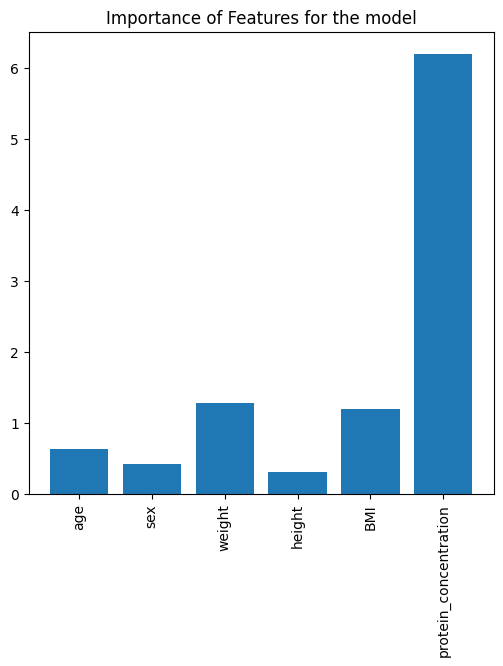

In [ ]:
plotFeatures(X_train.columns, importance_abs)

In [ ]:
#Alternatively

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
df4


,age,sex,weight,height,BMI,protein_concentration,RESPONSE
0,0.214286,1,0.337780,0.313725,0.313123,0.643357,0
1,0.238095,1,0.219746,0.411765,0.171591,0.202797,1
3,0.523810,1,0.147170,0.137255,0.201814,0.230769,1
7,0.476190,0,0.415358,0.392157,0.347515,0.412587,0
8,0.833333,0,0.345766,0.490196,0.249146,0.986014,0
...,...,...,...,...,...,...,...
762,0.785714,1,0.140763,0.450980,0.092862,0.230769,1
764,0.666667,0,0.585257,0.647059,0.372611,0.461538,0
765,0.547619,0,0.305924,0.666667,0.159240,0.454545,0
766,0.380952,0,0.372971,0.568627,0.242164,0.489510,1


In [ ]:
df4['RESPONSE'].value_counts(normalize=True)

1    0.548303
0    0.451697
Name: RESPONSE, dtype: float64

<Axes: >

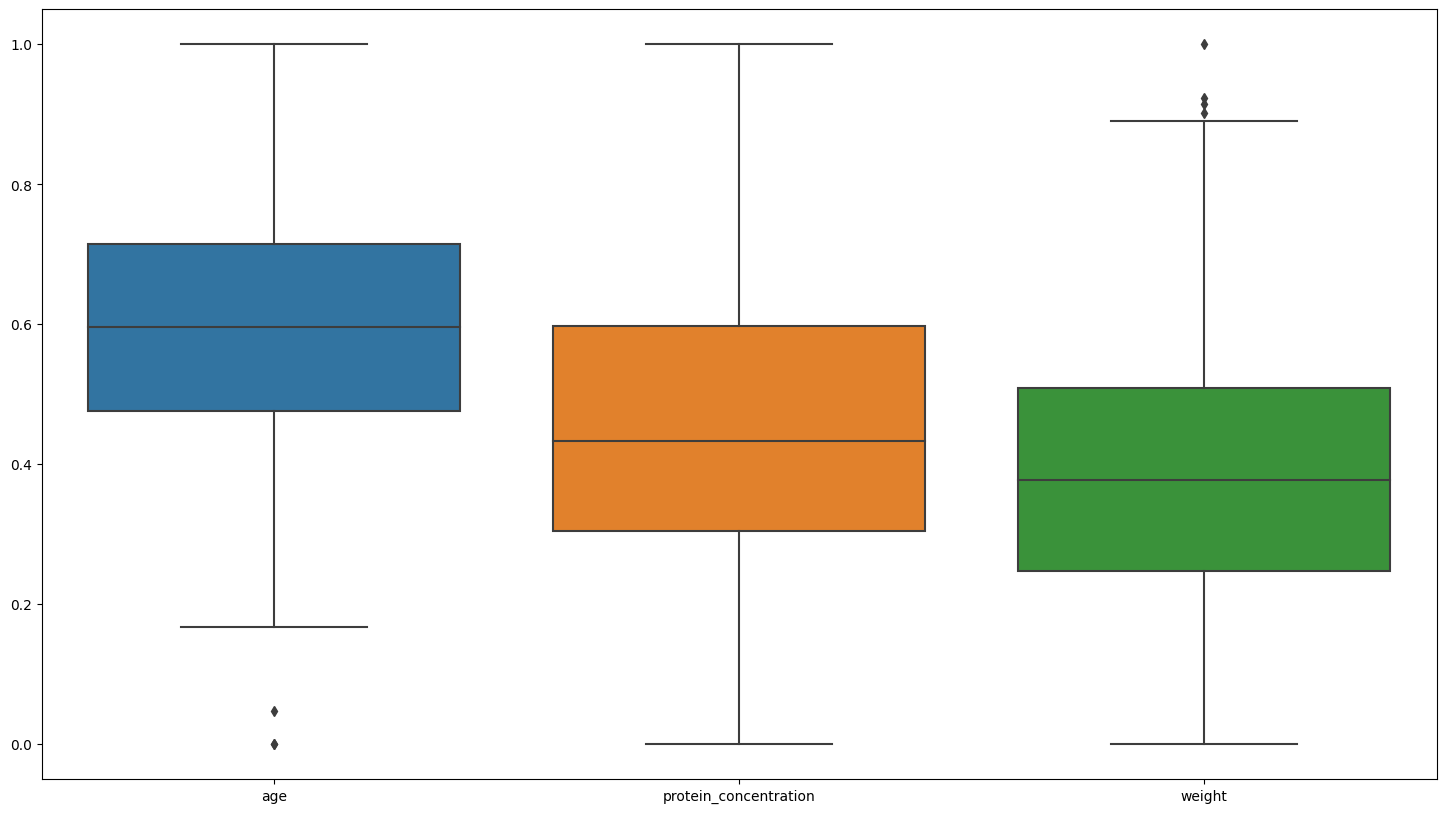

In [ ]:
plt.figure(figsize=(18,10))
sns.boxplot(data=df4[['age','protein_concentration','weight']])

,age,sex,weight,height,BMI,protein_concentration,RESPONSE
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,0.589519,0.488251,0.392050,0.495572,0.282946,0.462082,0.548303
std,0.180137,0.500516,0.197153,0.190317,0.144554,0.211072,0.498312
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.476190,0.000000,0.247214,0.352941,0.176195,0.304196,0.000000
50%,0.595238,0.000000,0.377797,0.490196,0.276599,0.433566,1.000000
75%,0.714286,1.000000,0.508688,0.647059,0.370272,0.597902,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# To split data into X and y variables before handling class imbalance using oversampling
X = df4.drop('RESPONSE', axis=1)
y = df4['RESPONSE']
sampler = RandomOverSampler()
X_resampled, y_resampled = sampler.fit_resample(X, y)



In [ ]:
X_resampled.shape

(420, 6)

In [ ]:
y_resampled.shape

(420,)

In [ ]:

y_resampled.value_counts(normalize=True)

0    0.5
1    0.5
Name: RESPONSE, dtype: float64

<Axes: title={'center': 'Class Balance'}, xlabel='RESPONSE', ylabel='count'>

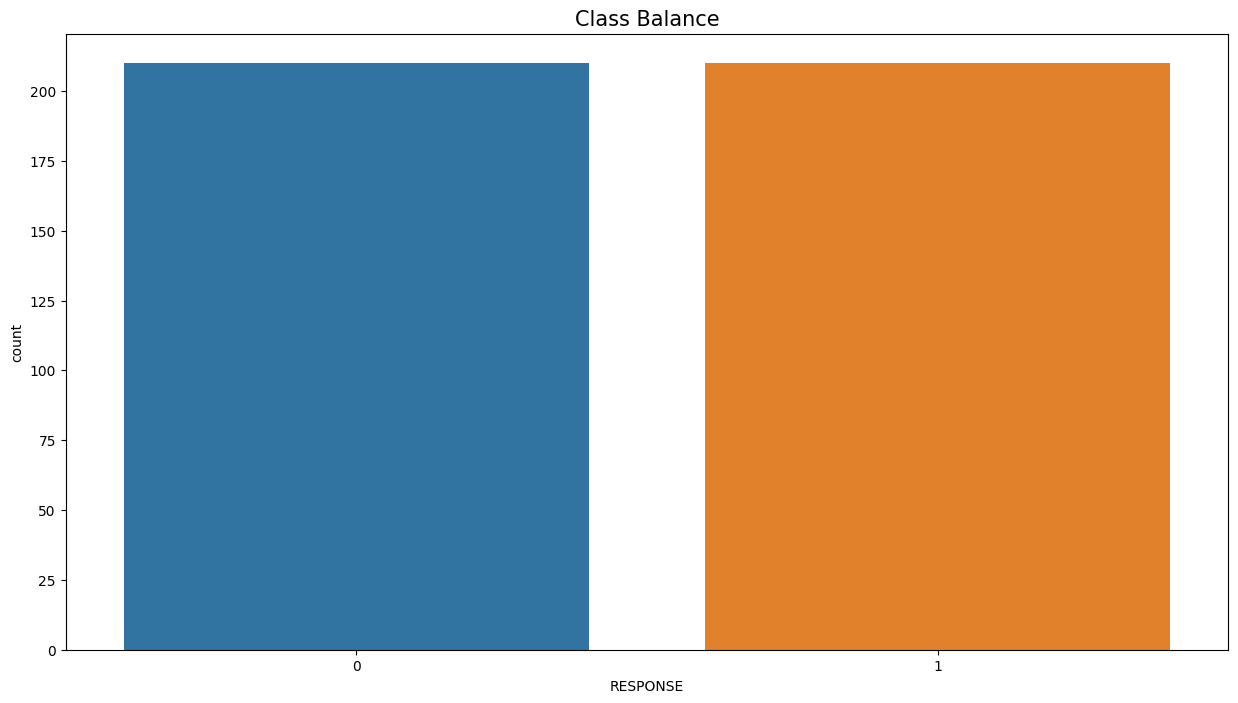

In [ ]:

plt.figure(figsize=(15,8))
plt.title('Class Balance', fontsize=15)
sns.countplot(x= y_resampled)

In [ ]:
X_resampled.head()

,age,sex,weight,height,BMI,protein_concentration
0,0.214286,1,0.337780,0.313725,0.313123,0.643357
1,0.238095,1,0.219746,0.411765,0.171591,0.202797
2,0.523810,1,0.147170,0.137255,0.201814,0.230769
3,0.476190,0,0.415358,0.392157,0.347515,0.412587
4,0.833333,0,0.345766,0.490196,0.249146,0.986014


In [ ]:
y_resampled.tail()

415    0
416    0
417    0
418    0
419    0
Name: RESPONSE, dtype: int64

[0 1]


In [ ]:
y_resampled.tail()

10321    1
10322    1
10323    1
10324    1
10325    1
Name: Churn, dtype: int64

In [ ]:
X = X_resampled

In [ ]:
y = y_resampled


In [ ]:
corr = df.corr()
corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [ ]:
# Instantiate SelectKBest with f_classif as the scoring function
selector = SelectKBest(score_func=f_classif, k=5)

# Fit the selector to the data
selector.fit(X_resampled, y_resampled)

# Get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features_names = X_resampled.columns[selected_features_indices]

# Print the names of the selected features
print(selected_features_names)


Index(['age', 'weight', 'height', 'BMI', 'protein_concentration'], dtype='object')


In [ ]:

# Display the scores of the top 5 features
scores = selector.scores_
top_k_scores = sorted(scores, reverse=True)[:5]
top_k_indices = np.argsort(scores)[::-1][:5]

print("Top 5 feature scores:")
for i in range(len(top_k_scores)):
    print("Feature {}: Score = {:.2f}".format(top_k_indices[i], top_k_scores[i]))


Top 5 feature scores:
Feature 5: Score = 316.64
Feature 3: Score = 0.74
Feature 2: Score = 0.62
Feature 0: Score = 0.28
Feature 4: Score = 0.24


In [ ]:




# Get the names and scores of the top 10 features
feature_names = df4.drop('RESPONSE', axis=1).columns
top_scores = selector.scores_.argsort()[-5:][::-1]
top_features = feature_names[top_scores]

# Print the names and scores of the top 10 features
for i, feature in enumerate(top_features):
    print("{}. {} ({:.2f})".format(i+1, feature, selector.scores_[top_scores][i]))

# Create a bar plot of the top 10 features and their scores
plt.figure(figsize=(20,8))
sns.set(font_scale=1.5)
plt.bar(range(len(top_scores)), selector.scores_[top_scores])
plt.xticks(range(len(top_scores)), top_features, rotation='horizontal')
plt.xlabel("Feature")
plt.ylabel("Score")
plt.title("Top 5 Features")
plt.show()


NameError: ignored

In [ ]:
# select the top K features using f_classic
kbest = SelectKBest(score_func=f_classif, k='all')
X_resampled = kbest.fit_transform(X_resampled, y_resampled)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3,random_state = 30)


In [ ]:


# train a decision tree classifier on the data
clf = DecisionTreeClassifier()

#clf = RandomForestClassifier()

clf.fit(X_train, y_train)

# test the classifier on the test set and print the classification report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.73      0.67      0.70        66
           1       0.67      0.73      0.70        60

    accuracy                           0.70       126
   macro avg       0.70      0.70      0.70       126
weighted avg       0.70      0.70      0.70       126



In [ ]:

Accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy score:%.2f\n\n'%(Accuracy))
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('The confusion matrix is:')
print(conf_matrix,'\n\n')
print('---------------------')
result = metrics.classification_report(y_test, y_pred)
print('Classification Report:\n')
print(result)

Accuracy score:0.70


The confusion matrix is:
[[44 22]
 [16 44]] 


---------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.67      0.70        66
           1       0.67      0.73      0.70        60

    accuracy                           0.70       126
   macro avg       0.70      0.70      0.70       126
weighted avg       0.70      0.70      0.70       126



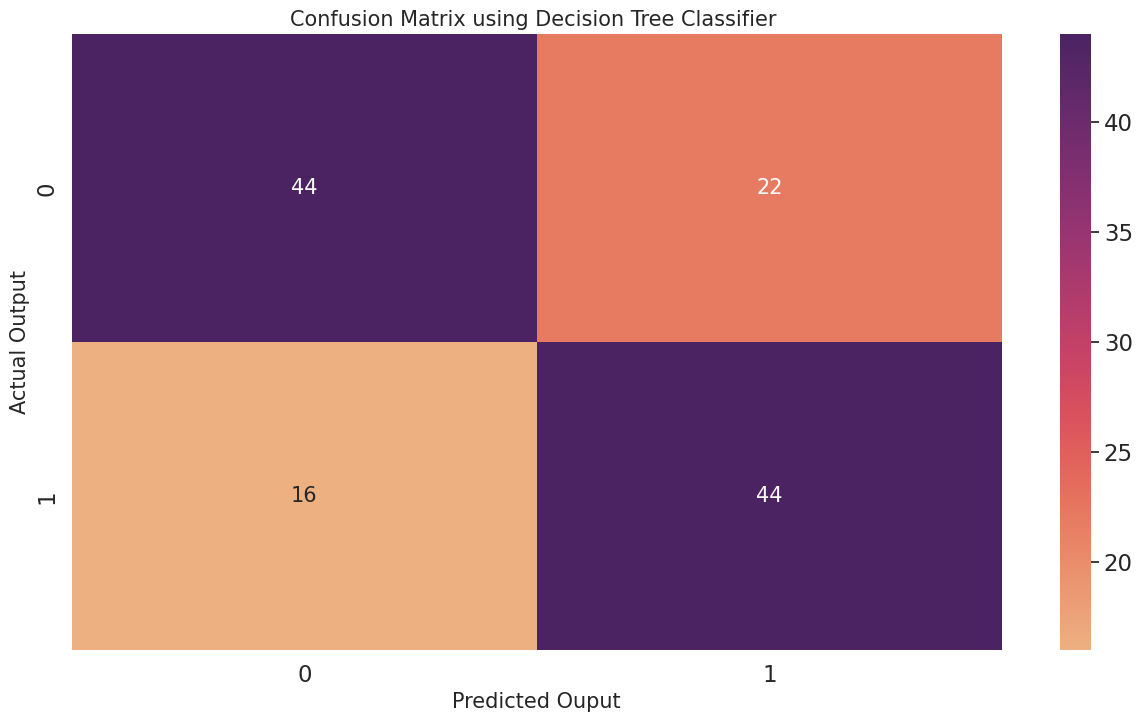

In [ ]:
plt.figure(figsize=(15,8))
zx = sns. heatmap(conf_matrix, cmap ='flare', annot_kws={"size": 15}, annot= True, fmt = 'd')
plt.title('Confusion Matrix using Decision Tree Classifier ', fontsize= 15)
plt.xlabel('Predicted Ouput', fontsize =15)
plt.ylabel('Actual Output', fontsize =15)
plt.show()

In [ ]:

# Define the Decision Tree classifier
dt = DecisionTreeClassifier()

# Define the hyperparameters to tune
param_grid = {'max_depth': [12, 15, 20],
              'min_samples_split': [2,3, 4, 6, 8,],
              'min_samples_leaf': [1, 2, 3, 4, 5]}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, verbose=0)
grid_search.fit(X, y)

# Print the results
print("Best accuracy score: {:.2f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))


Best accuracy score: 0.79
Best parameters: {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [ ]:


# Using best hypeparameter


# train a decision tree classifier on the data
clf = DecisionTreeClassifier(max_depth= 20, min_samples_leaf = 1, min_samples_split= 2)

#clf = RandomForestClassifier()

clf.fit(X_train, y_train)

# test the classifier on the test set and print the classification report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.68      0.70        66
           1       0.67      0.72      0.69        60

    accuracy                           0.70       126
   macro avg       0.70      0.70      0.70       126
weighted avg       0.70      0.70      0.70       126



In [ ]:

Accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy score:%.2f\n\n'%(Accuracy))
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('The confusion matrix is:')
print(conf_matrix,'\n\n')
print('---------------------')
result = metrics.classification_report(y_test, y_pred)
print('Classification Report:\n')
print(result)

Accuracy score:0.70


The confusion matrix is:
[[45 21]
 [17 43]] 


---------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.68      0.70        66
           1       0.67      0.72      0.69        60

    accuracy                           0.70       126
   macro avg       0.70      0.70      0.70       126
weighted avg       0.70      0.70      0.70       126



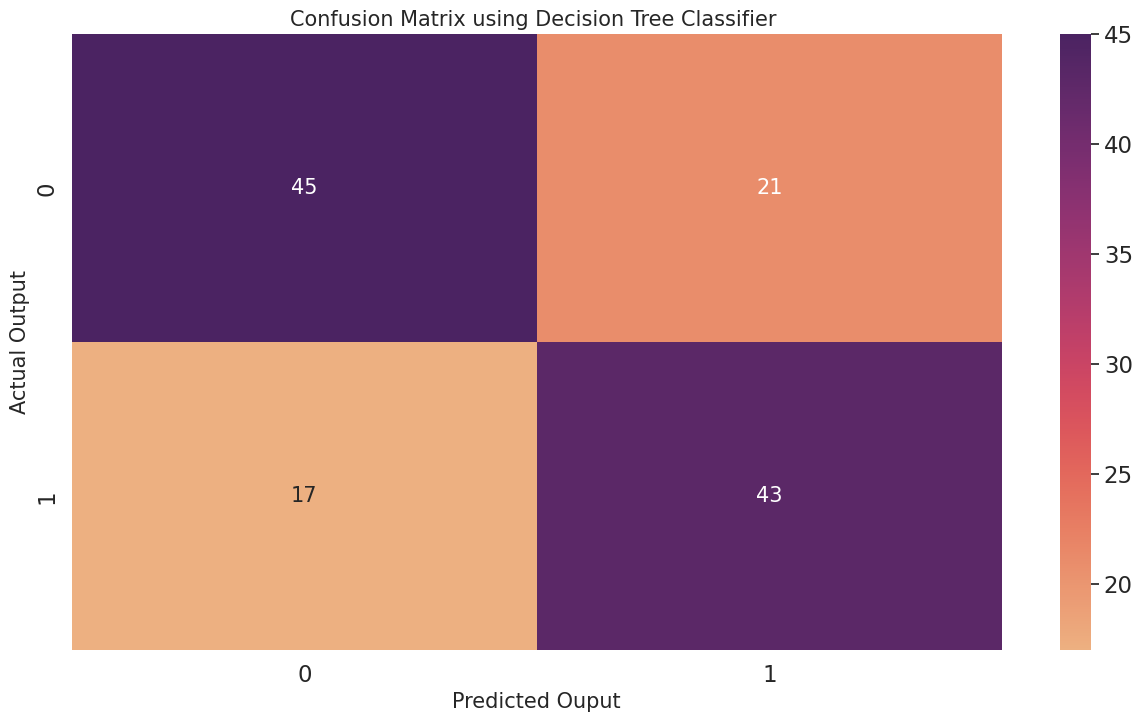

In [ ]:
plt.figure(figsize=(15,8))
zx = sns. heatmap(conf_matrix, cmap ='flare', annot_kws={"size": 15}, annot= True, fmt = 'd')
plt.title('Confusion Matrix using Decision Tree Classifier ', fontsize= 15)
plt.xlabel('Predicted Ouput', fontsize =15)
plt.ylabel('Actual Output', fontsize =15)
plt.show()

In [ ]:
#Using RandomForest

# train a decision tree classifier on the data
#clf = DecisionTreeClassifier()

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

# test the classifier on the test set and print the classification report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        66
           1       0.77      0.85      0.81        60

    accuracy                           0.81       126
   macro avg       0.81      0.81      0.81       126
weighted avg       0.81      0.81      0.81       126



In [ ]:

Accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy score:%.2f\n\n'%(Accuracy))
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('The confusion matrix is:')
print(conf_matrix,'\n\n')
print('---------------------')
result = metrics.classification_report(y_test, y_pred)
print('Classification Report:\n')
print(result)

Accuracy score:0.81


The confusion matrix is:
[[51 15]
 [ 9 51]] 


---------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        66
           1       0.77      0.85      0.81        60

    accuracy                           0.81       126
   macro avg       0.81      0.81      0.81       126
weighted avg       0.81      0.81      0.81       126



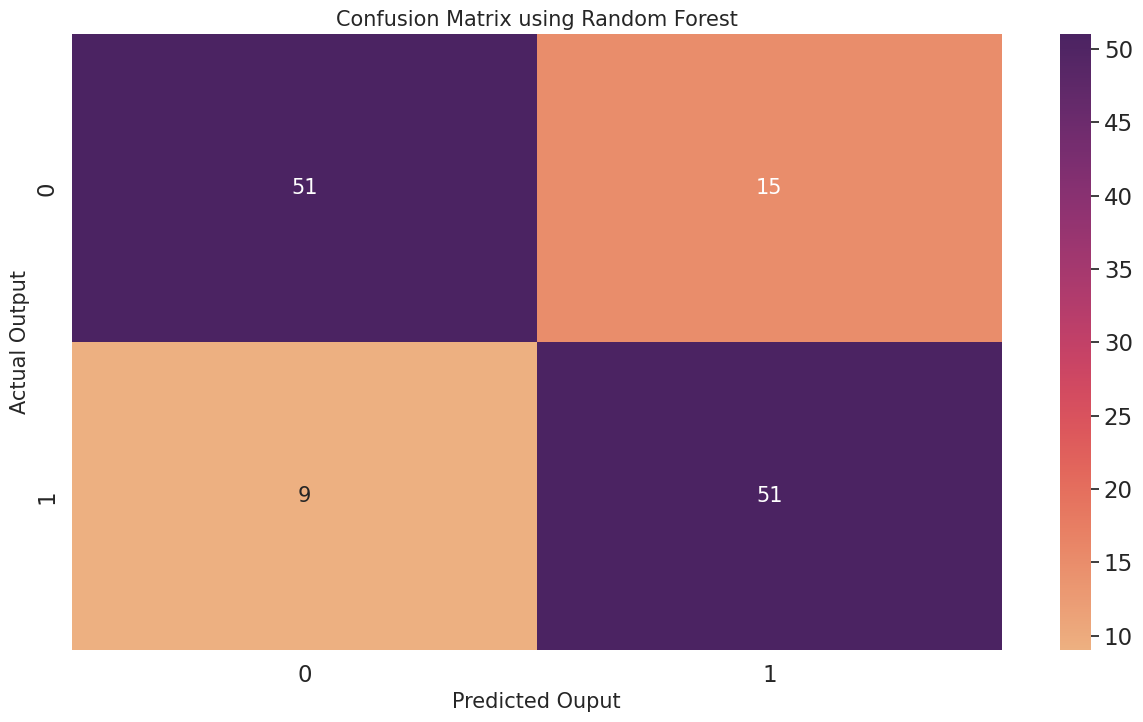

In [ ]:
plt.figure(figsize=(15,8))
zx = sns. heatmap(conf_matrix, cmap ='flare',annot_kws={"size": 15}, annot= True, fmt = 'd')
plt.title('Confusion Matrix using Random Forest', fontsize= 15)
plt.xlabel('Predicted Ouput', fontsize =15)
plt.ylabel('Actual Output', fontsize =15)
plt.show()

In [ ]:
# GRADIENT BOOSTED DECISION TREE



clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=14, random_state=42)
clf.fit(X_train, y_train)

# test the classifier on the test set and print the classification report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        66
           1       0.74      0.77      0.75        60

    accuracy                           0.76       126
   macro avg       0.76      0.76      0.76       126
weighted avg       0.76      0.76      0.76       126



In [ ]:
from sklearn import metrics
Accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy score:%.2f\n\n'%(Accuracy))
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('The confusion matrix is:')
print(conf_matrix,'\n\n')
print('---------------------')
result = metrics.classification_report(y_test, y_pred)
print('Classification Report:\n')
print(result)

Accuracy score:0.76


The confusion matrix is:
[[50 16]
 [14 46]] 


---------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        66
           1       0.74      0.77      0.75        60

    accuracy                           0.76       126
   macro avg       0.76      0.76      0.76       126
weighted avg       0.76      0.76      0.76       126



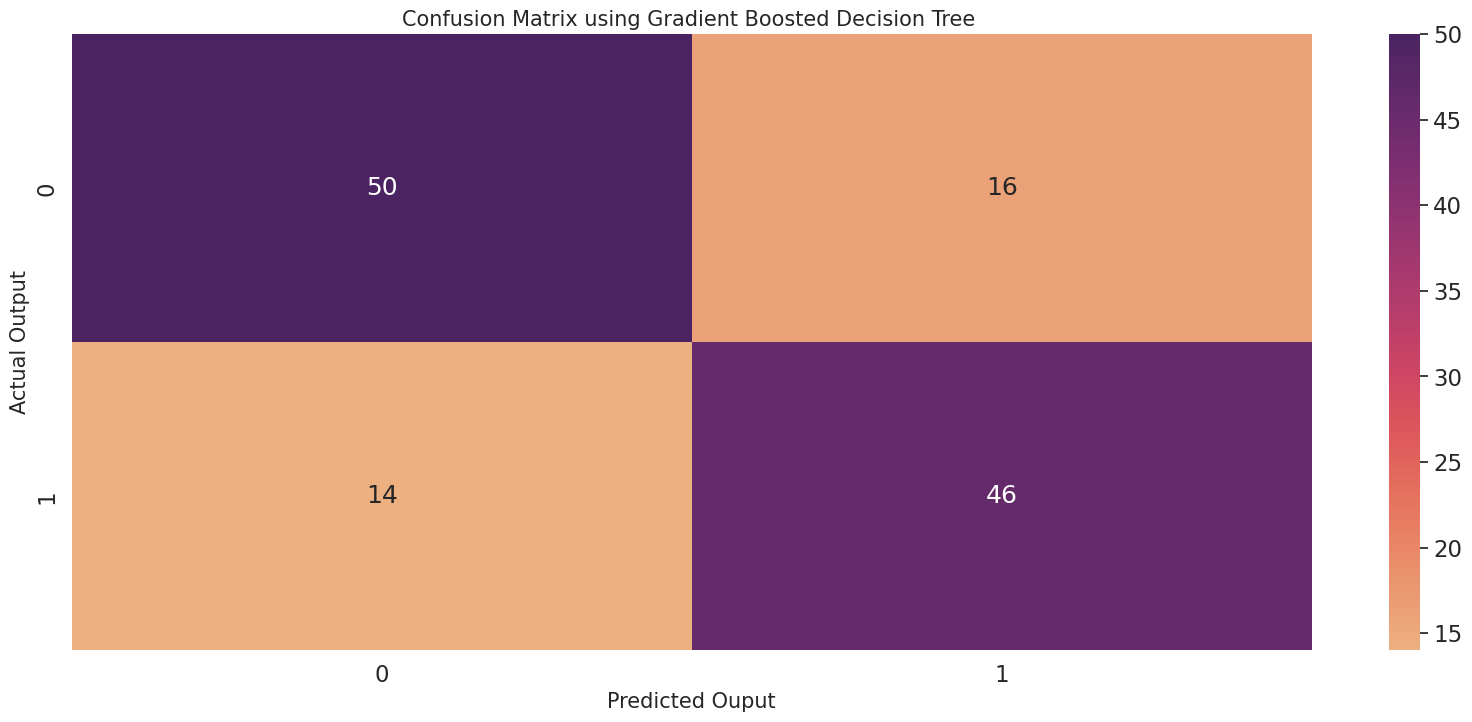

In [ ]:
plt.figure(figsize=(20,8))
zx = sns. heatmap(conf_matrix, cmap ='flare', annot_kws={"size": 18},annot= True, fmt = 'd')
plt.title('Confusion Matrix using Gradient Boosted Decision Tree ', fontsize= 15)
plt.xlabel('Predicted Ouput', fontsize =15)
plt.ylabel('Actual Output', fontsize =15)
plt.show()

In [ ]:
# Identifying top 10 features driving the Gradient Boosted Decision model by allowing the model to select importance features itself

In [ ]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 40)



In [ ]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform (X_test)

In [ ]:

# Step 4: Model Evaluation
from sklearn.metrics import f1_score

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=18, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = f1_score(y_test, y_pred)
print(f"F1-score: {score:.4f}")

F1-score: 0.8130


In [ ]:
from sklearn import metrics
Accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy score:%.2f\n\n'%(Accuracy))
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('The confusion matrix is:')
print(conf_matrix,'\n\n')
print('---------------------')
result = metrics.classification_report(y_test, y_pred)
print('Classification Report:\n')
print(result)

Accuracy score:0.80


The confusion matrix is:
[[42 10]
 [13 50]] 


---------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        52
           1       0.83      0.79      0.81        63

    accuracy                           0.80       115
   macro avg       0.80      0.80      0.80       115
weighted avg       0.80      0.80      0.80       115



In [ ]:
#Step 5: Feature Importance Analysis
feature_importances = clf.feature_importances_
feature_names = df4.drop('RESPONSE', axis=1).columns


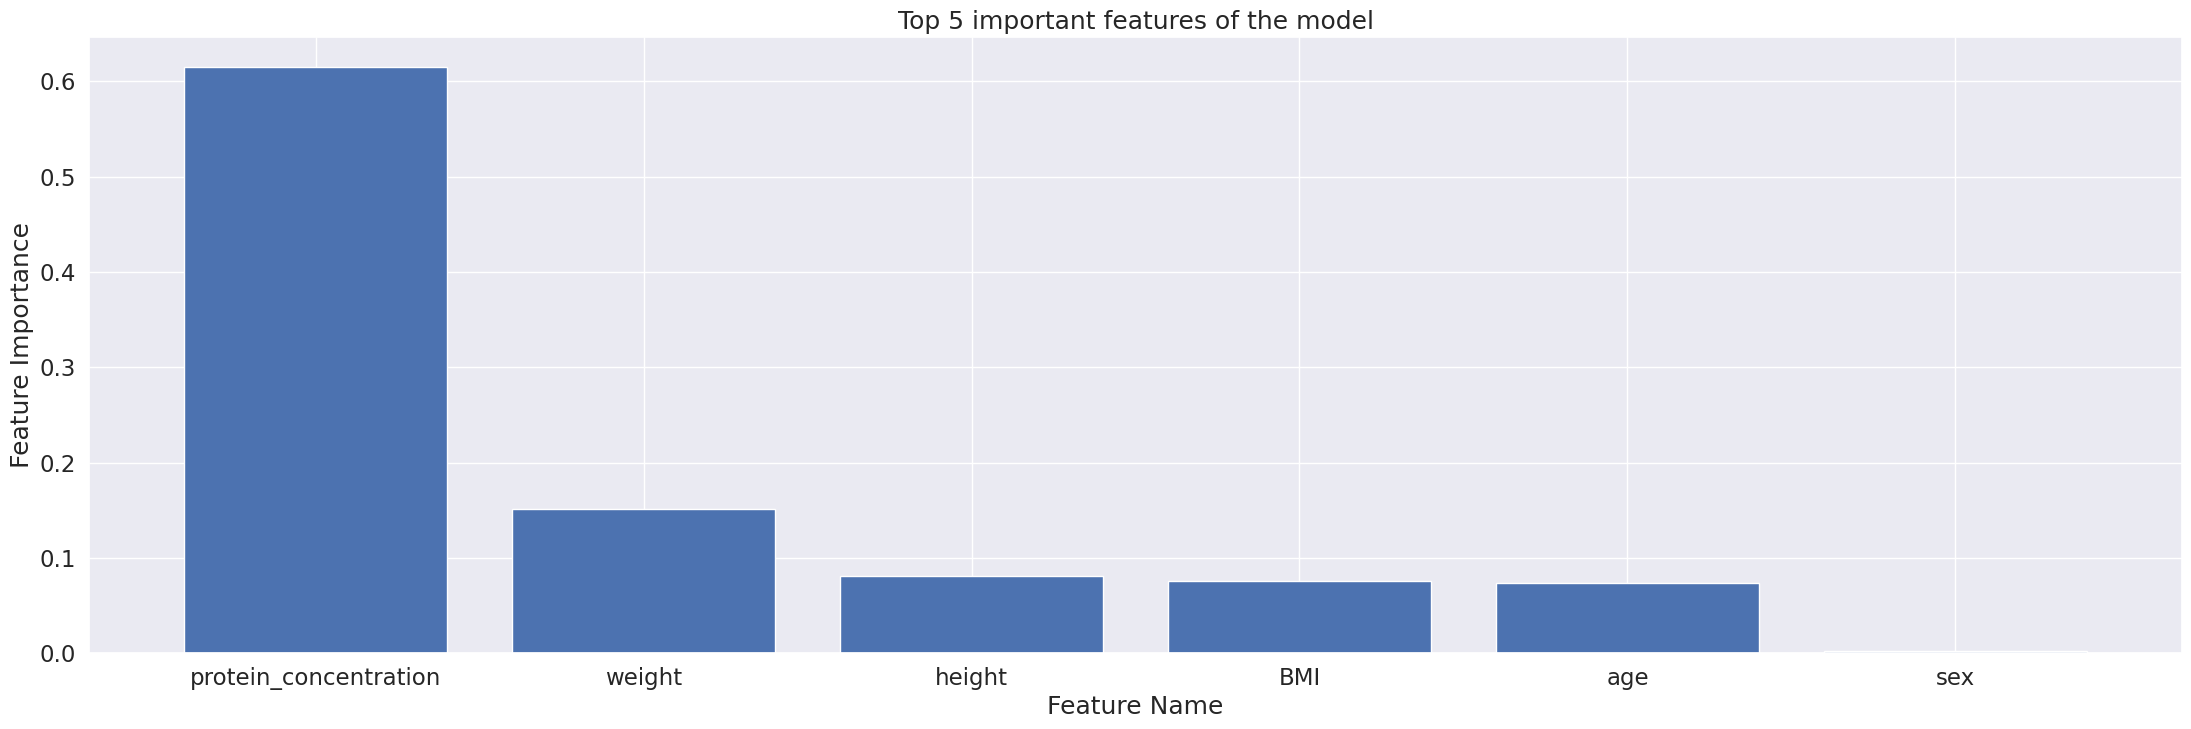

In [ ]:

# Step 6: Plot Feature Importance Graph


top_features = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)[:10]
plt.figure(figsize=(27,8))
plt.bar(top_features.index, top_features)
plt.title('Top 5 important features of the model')
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.show()

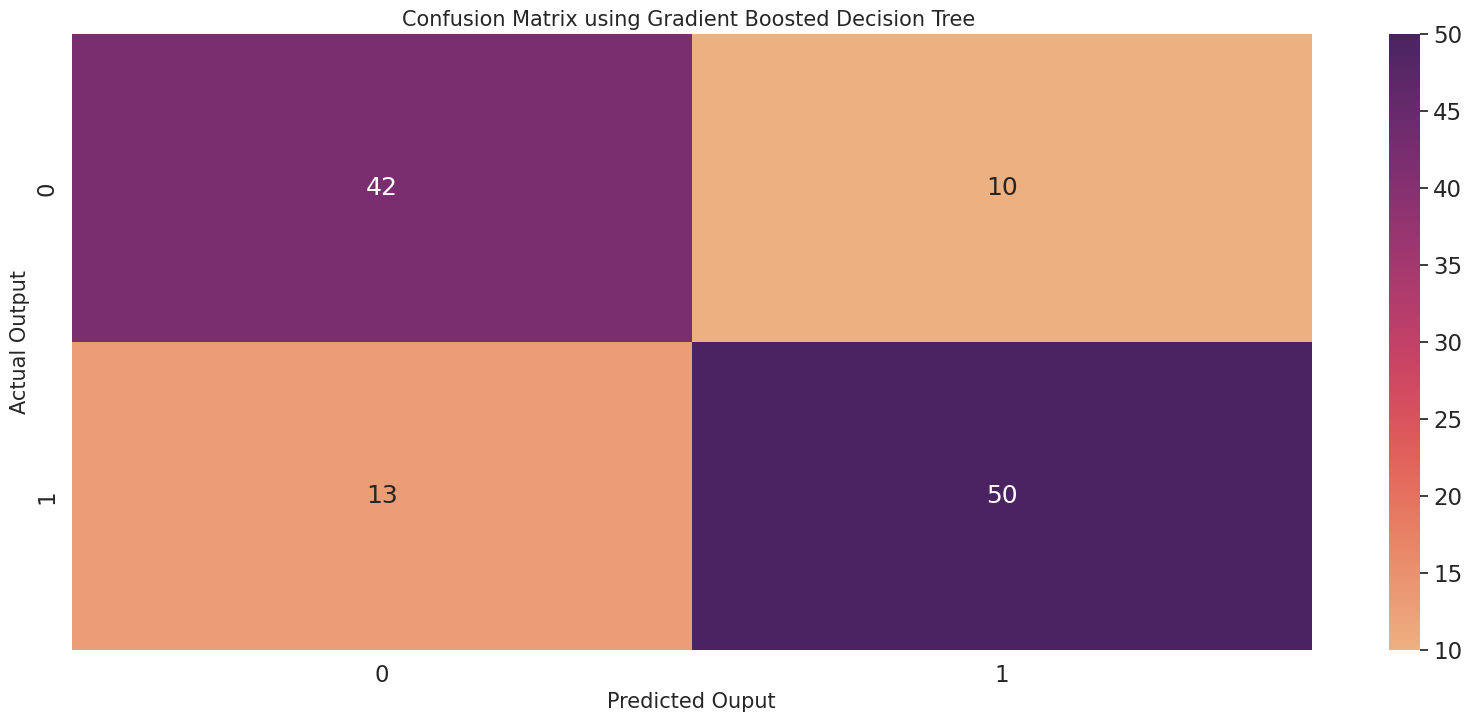

In [ ]:
plt.figure(figsize=(20,8))
zx = sns. heatmap(conf_matrix, cmap ='flare', annot_kws={"size": 18},annot= True, fmt = 'd')
plt.title('Confusion Matrix using Gradient Boosted Decision Tree ', fontsize= 15)
plt.xlabel('Predicted Ouput', fontsize =15)
plt.ylabel('Actual Output', fontsize =15)
plt.show()